Garma, L. D., & Osório, N. S. (Submitted). Demystifying Dimensionality Reduction Techniques in the 'Omics' Era: A Practical Approach for Biological Science Students. *Corresponding authors: leonardo.garma@cnio.eski.se, nosorio@med.uminho.pt

# Installation

In [1]:
# Import the necessary modules every time you restart the notebook
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Import the data

In [ ]:
# Download the COVID-19 data for these examples
!wget https://raw.githubusercontent.com/Leo-GG/DimRed_tutorial/main/demographicsMaterials/covid_processed.csv

# Explore the examples

In [3]:
df=pd.read_csv('covid_processed.csv',index_col=0)

In [4]:
df.head(3)

,Life exp,Deaths,Deaths_per_M,Population,GDP_pc,Recovery_rate,Region
Country,,,,,,,
Spain,1.000000,0.596101,0.442641,0.681069,0.393070,0.988008,Southern Europe
Italy,0.997596,0.928193,0.535354,0.876958,0.437076,0.974776,Southern Europe
Norway,0.992788,0.021839,0.137446,0.080326,0.995690,1.000000,Nordics


## PCA example with 2 redundant features

In [5]:
# Subsample data
df2d=df[['Population','Deaths']]

In [6]:
# Run PCA with 2 components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df2d)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

Text(0, 0.5, 'Fraction of variance explained')

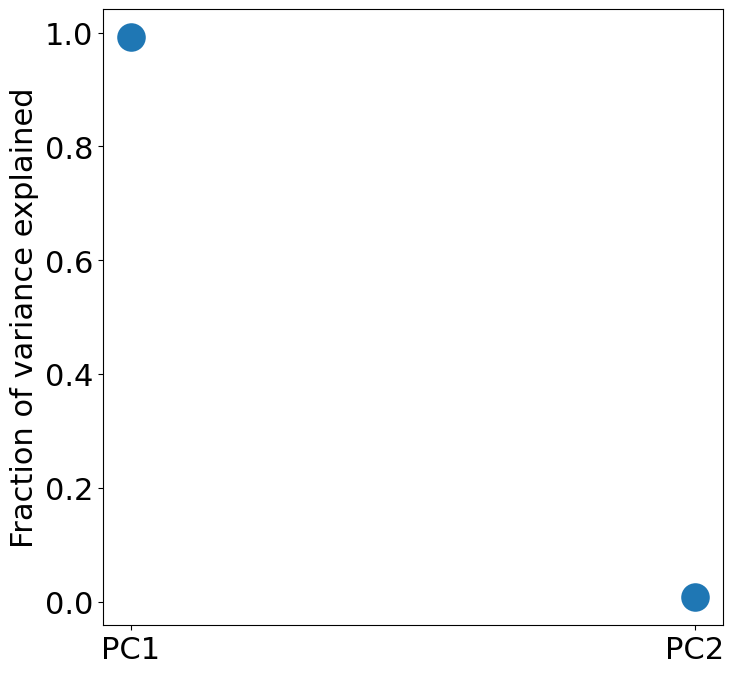

In [7]:
# Differences in variance explained
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize']=(8,8)

sns.scatterplot(x=pd.Series(pca.explained_variance_ratio_,index=['PC1','PC2']).index,
            y=pd.Series(pca.explained_variance_ratio_,index=['PC1','PC2']).values,
               s=500)
plt.ylabel('Fraction of variance explained')

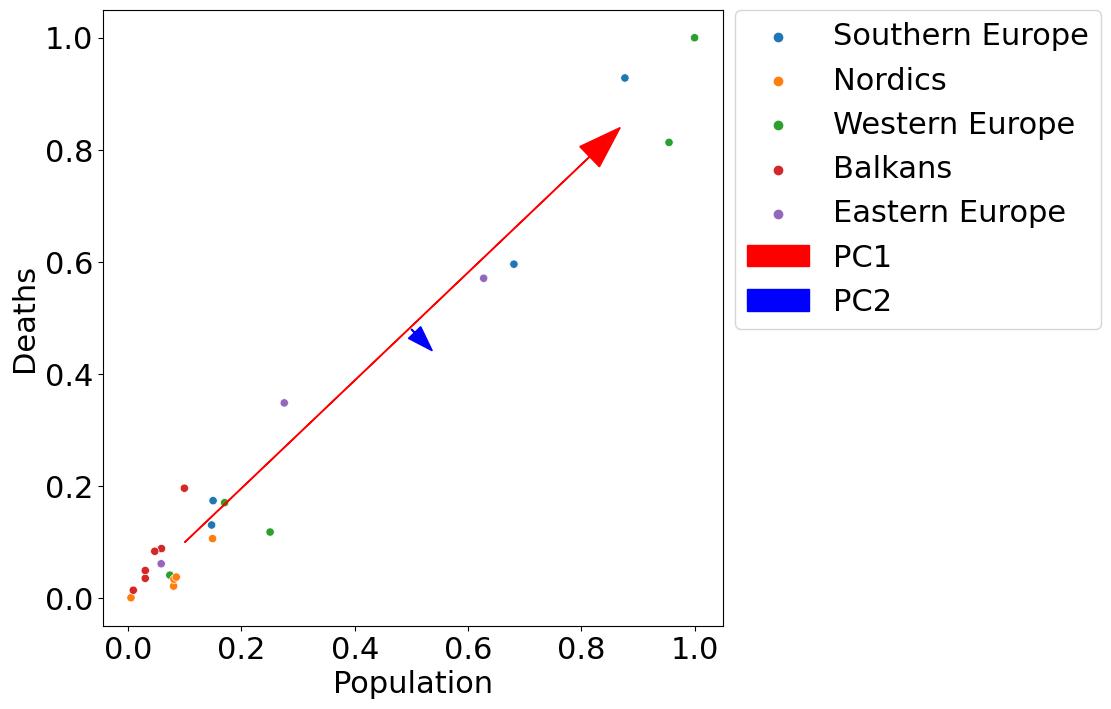

In [8]:
# Plot the two features and overlay the PCs scaled by their explained variance
sns.scatterplot(data=df,x='Population',y='Deaths',hue='Region')
scale1=pca.explained_variance_ratio_[0]
plt.arrow(x=0.1, y=0.1, dx=pca.components_[0][0]*scale1,
          dy=pca.components_[0][1]*scale1,color='r',head_width=0.05,
         label='PC1')

scale2=pca.explained_variance_ratio_[1]
plt.arrow(x=0.5, y=0.48, dx=pca.components_[1][0]*scale2,
          dy=pca.components_[1][1]*scale2,color='b',head_width=0.03,
          label='PC2')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

## PCA example with 2 pairs of redundant features

In [10]:
# Subsample data
df4d=df[['Population','Deaths','GDP_pc','Deaths_per_M','Region']].copy()

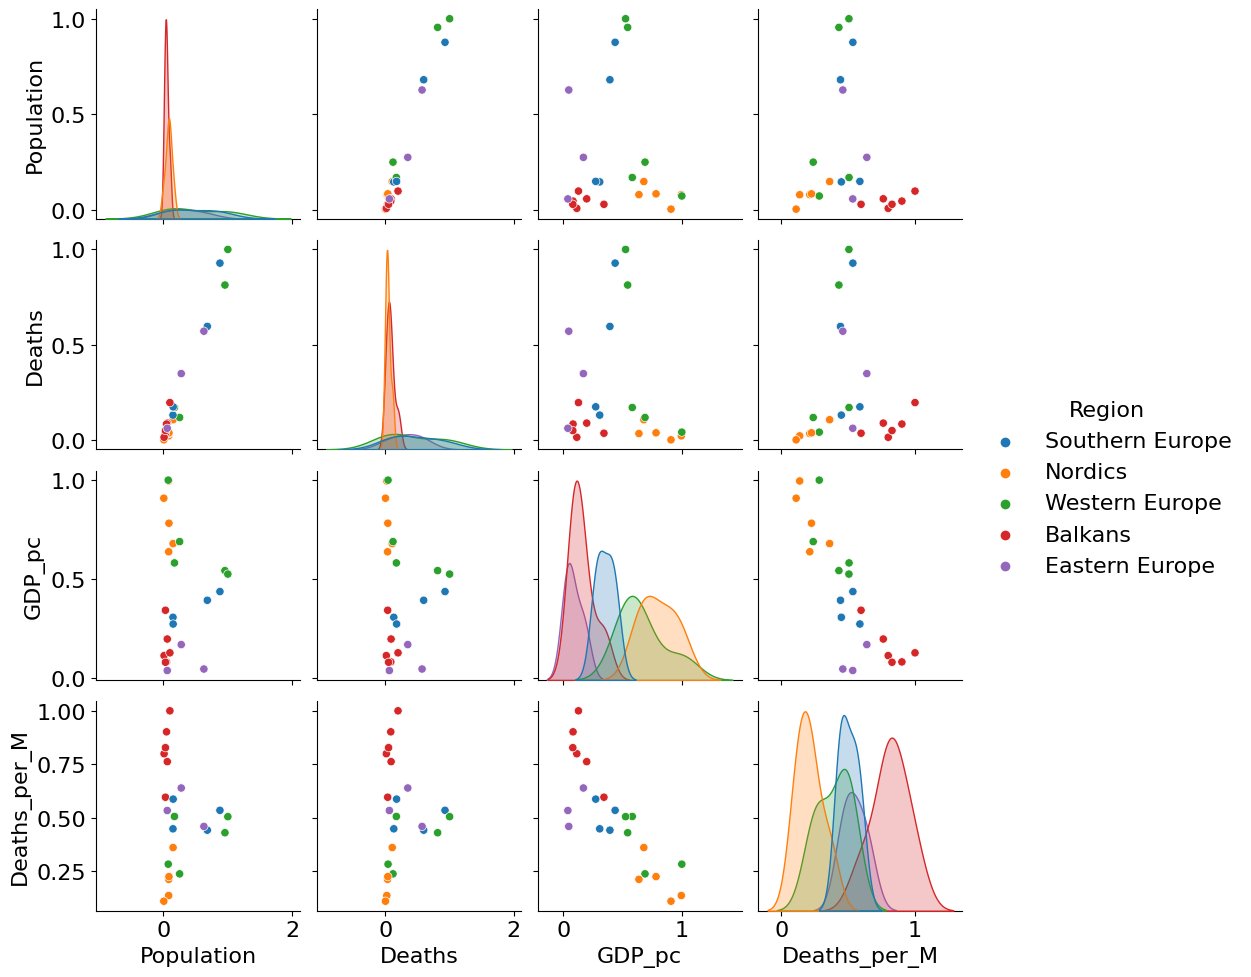

In [11]:
# Visualize the features, observe correlations between pairs
plt.rcParams.update({'font.size': 16})
sns.pairplot(df4d, hue="Region")
df4d.drop(columns='Region',inplace=True)

In [12]:
# Run PCA with 4 components
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(df4d)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3','PC4'])

Text(0, 0.5, 'Fraction of variance explained')

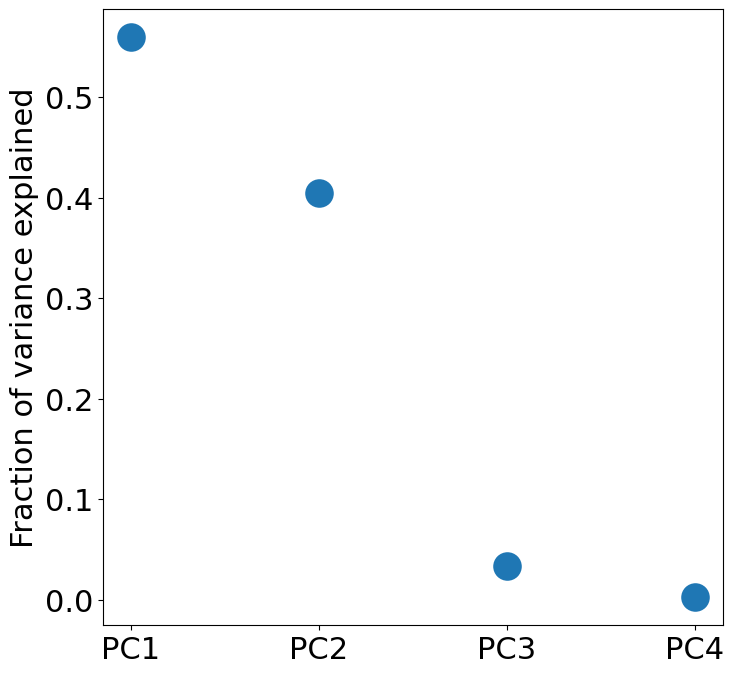

In [13]:
# Differences in variance explained
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize']=(8,8)

sns.scatterplot(x=pd.Series(pca.explained_variance_ratio_,index=['PC1', 'PC2','PC3','PC4']).index,
            y=pd.Series(pca.explained_variance_ratio_,index=['PC1', 'PC2','PC3','PC4']).values,
               s=500)
plt.ylabel('Fraction of variance explained')

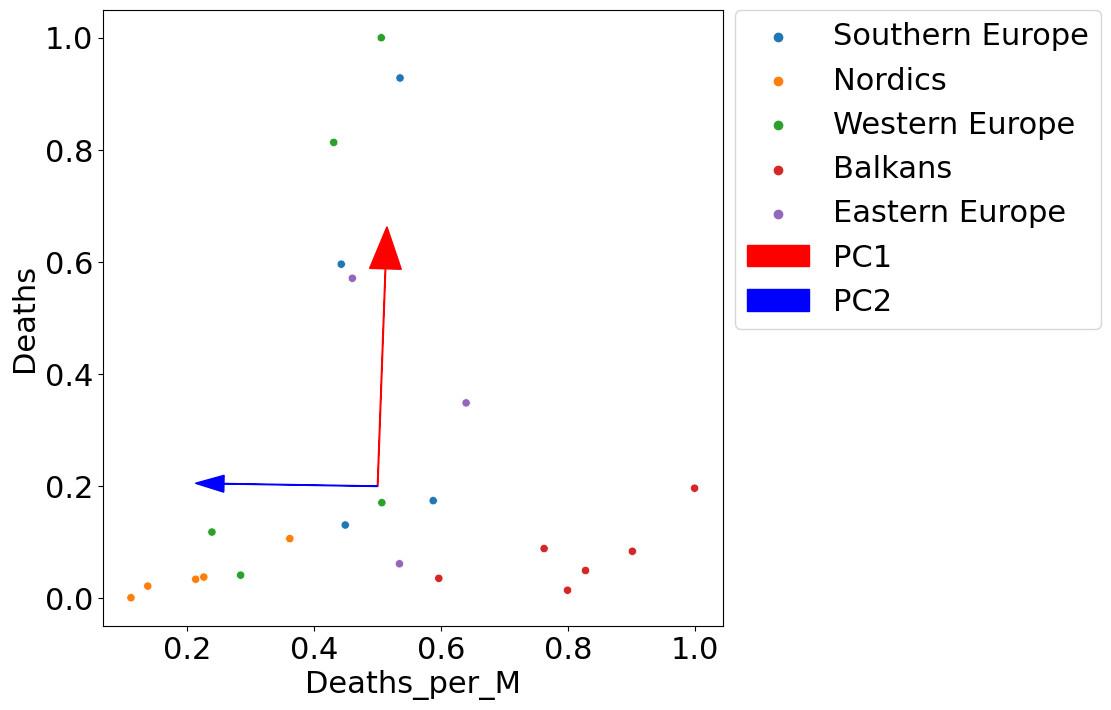

In [15]:
# Plot two of the features and overlay the PCs scaled by their explained variance
sns.scatterplot(data=df,x='Deaths_per_M',y='Deaths',hue='Region')
scale1=pca.explained_variance_ratio_[0]
plt.arrow(x=0.5, y=0.2, dx=pca.components_[0][3]*scale1,
          dy=pca.components_[0][1]*scale1,color='r',head_width=0.05,
         label='PC1')

scale2=pca.explained_variance_ratio_[1]
plt.arrow(x=0.5, y=0.2, dx=pca.components_[1][3]*scale2,
          dy=pca.components_[1][1]*scale2,color='b',head_width=0.03,
          label='PC2')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

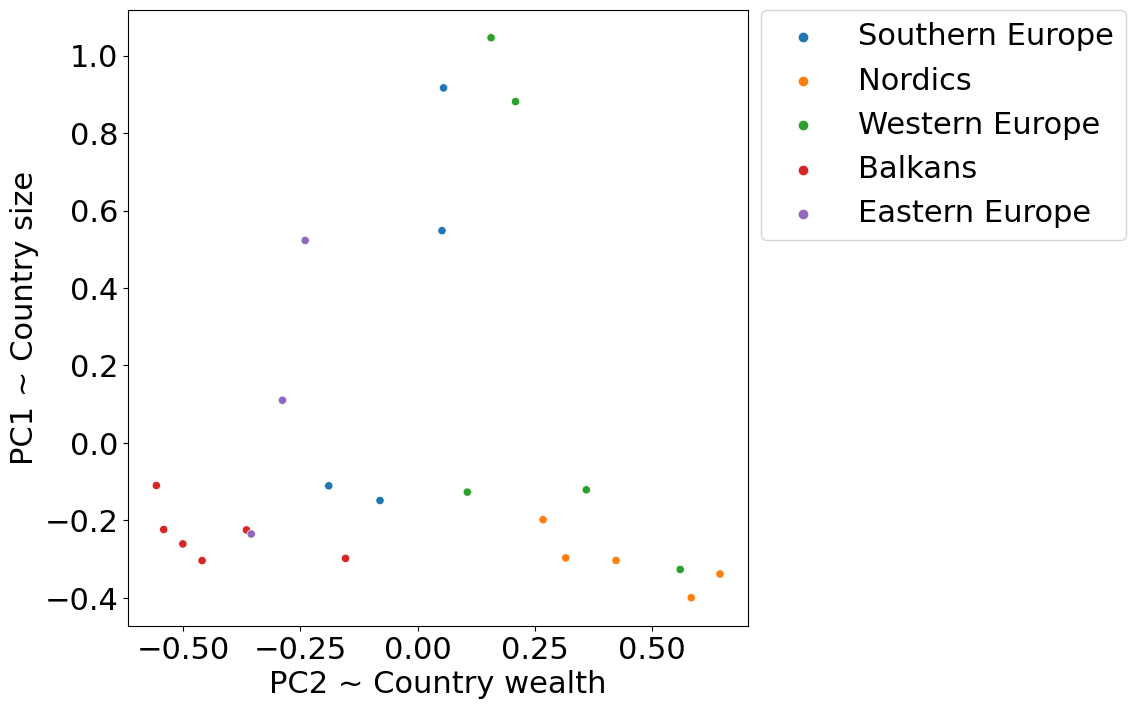

In [16]:
# Project the data onto the first 2 PCs
principalDf['Region']=df['Region'].values
g=sns.scatterplot(data=principalDf,x='PC2',y='PC1',hue='Region')
g.set_xlabel('PC2 ~ Country wealth')
g.set_ylabel('PC1 ~ Country size')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

## PCA example adding non-informative features

In [18]:
df6d=df[['Population','Deaths','GDP_pc','Deaths_per_M','Life exp','Recovery_rate','Region']].copy()

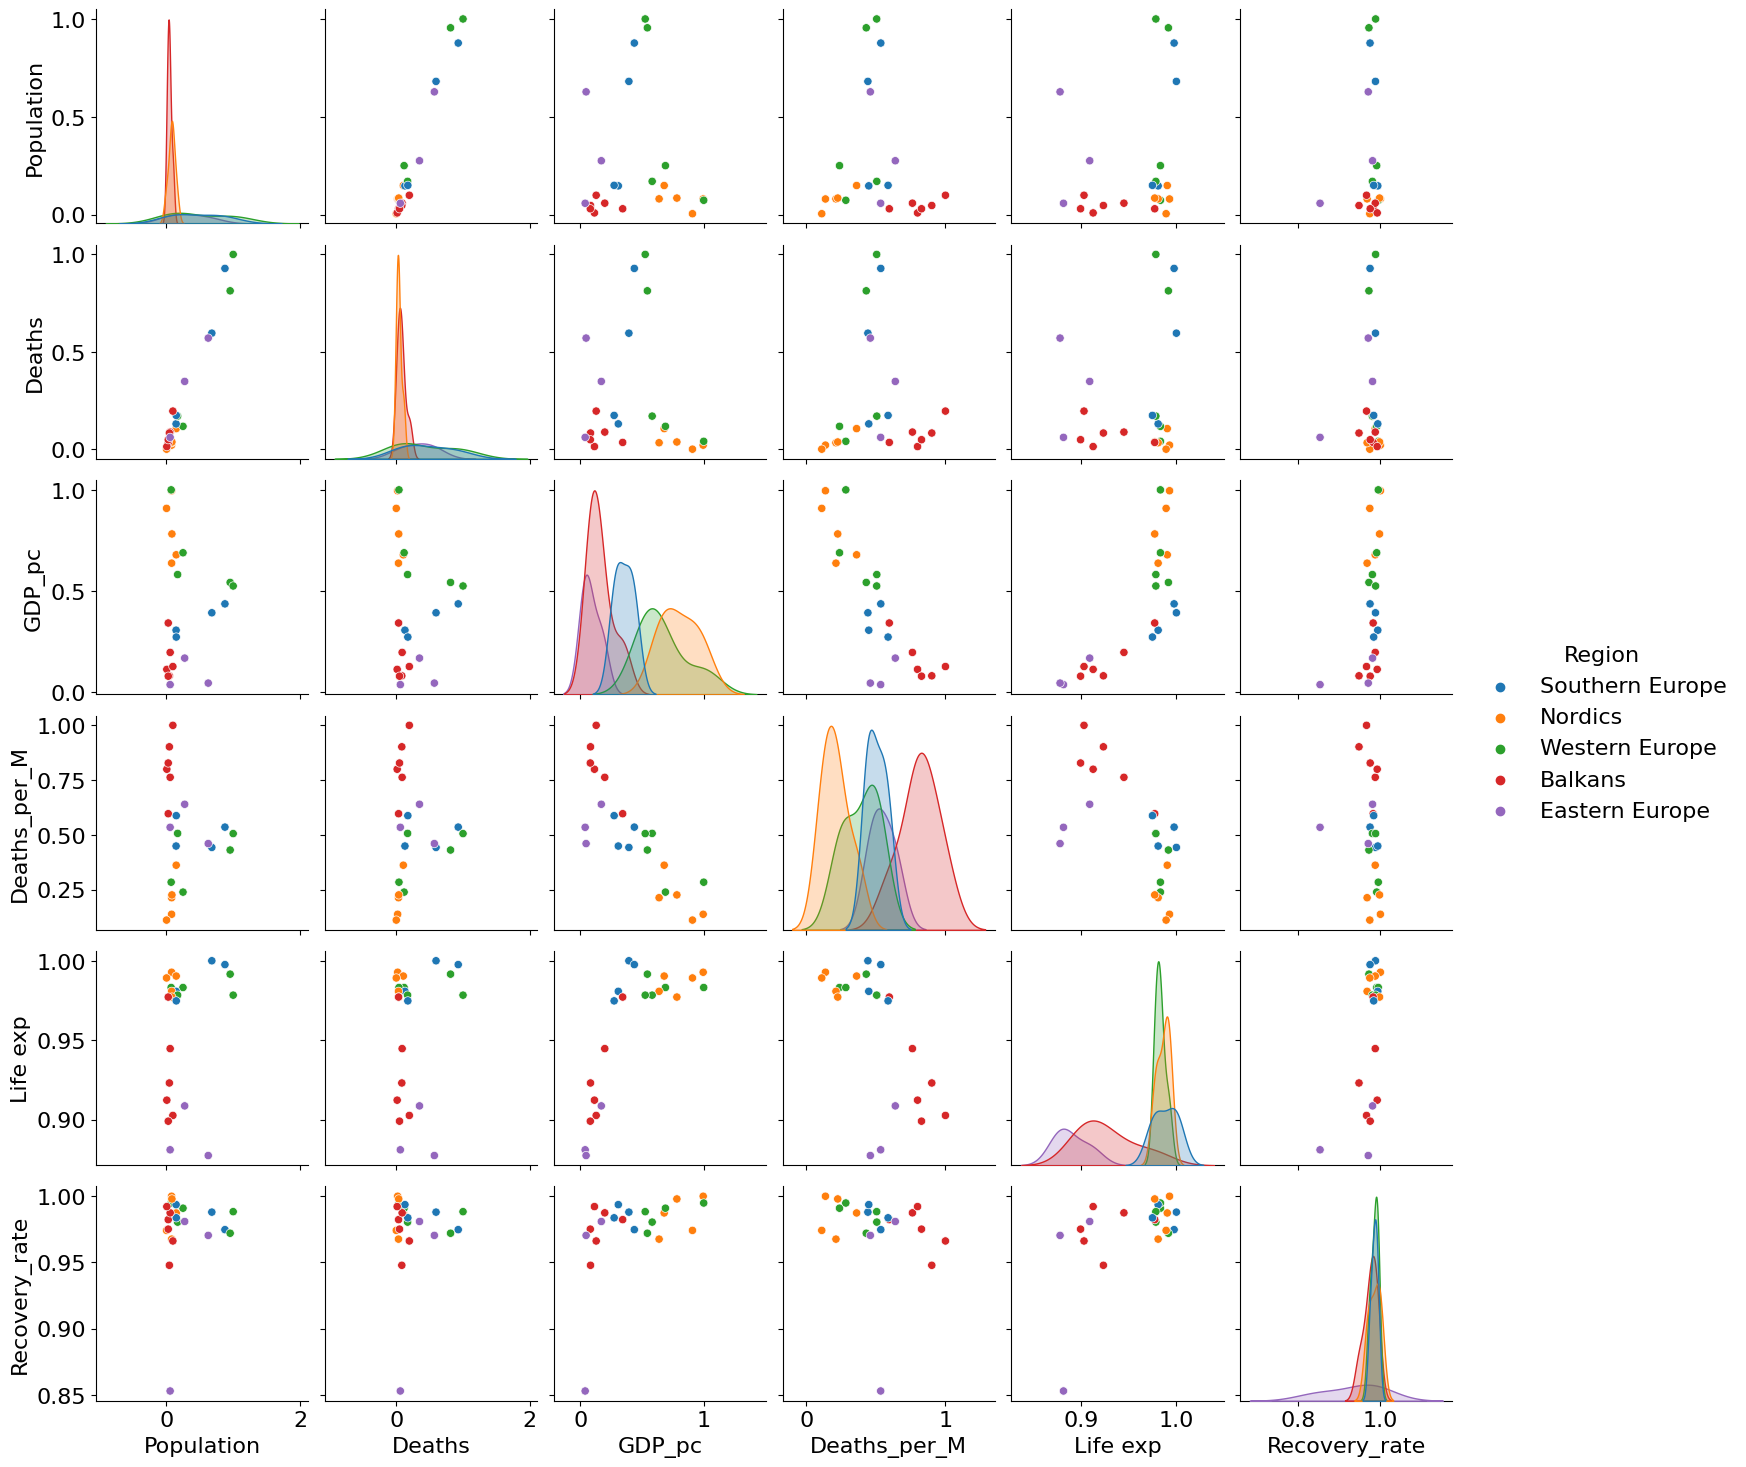

In [19]:
# Visualize the features, observe correlations between pairs
plt.rcParams.update({'font.size': 16})
sns.pairplot(df6d, hue="Region")
df6d.drop(columns='Region',inplace=True)

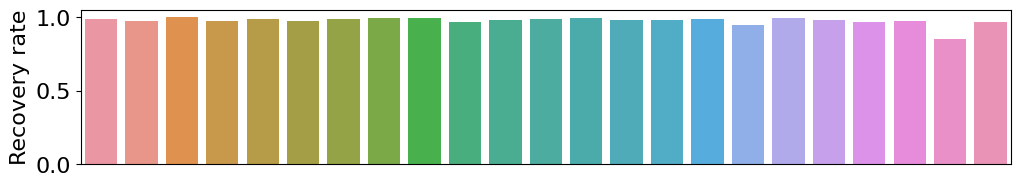

In [20]:
plt.rcParams['figure.figsize']=(12,2) #rescale figures
plt.rcParams.update({'font.size': 16})

sns.barplot(data=df,x=df.index,y='Recovery_rate')
plt.ylabel('Recovery rate')
plt.xlabel('')
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.rcParams['figure.figsize']=(12,4) #rescale figures
#plt.ylim([0,8000])

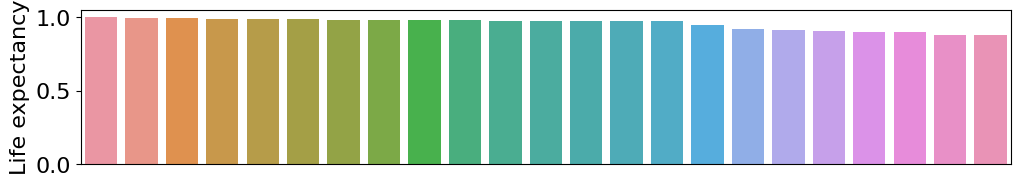

In [21]:
plt.rcParams['figure.figsize']=(12,2) #rescale figures
plt.rcParams.update({'font.size': 16})

sns.barplot(data=df,x=df.index,y='Life exp')
plt.ylabel('Life expectancy')
plt.xlabel('')
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.rcParams['figure.figsize']=(12,4) #rescale figures
#plt.ylim([0,8000])

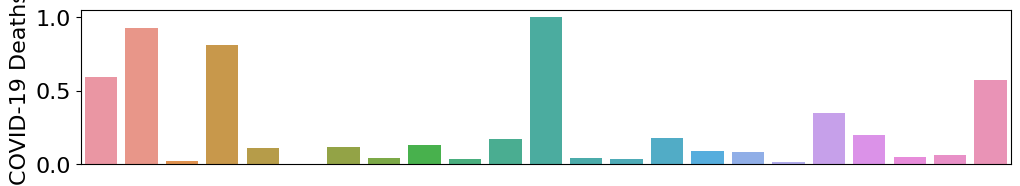

In [22]:
plt.rcParams['figure.figsize']=(12,2) #rescale figures
plt.rcParams.update({'font.size': 16})

sns.barplot(data=df,x=df.index,y='Deaths')
plt.ylabel('COVID-19 Deaths')
plt.xlabel('')
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.rcParams['figure.figsize']=(12,4) #rescale figures
#plt.ylim([0,8000])

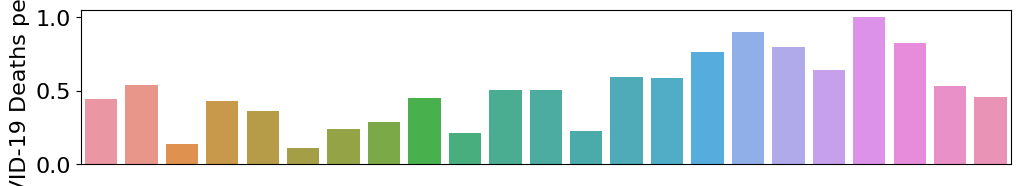

In [24]:
plt.rcParams['figure.figsize']=(12,2) #rescale figures
plt.rcParams.update({'font.size': 16})

sns.barplot(data=df,x=df.index,y='Deaths_per_M')
plt.ylabel('COVID-19 Deaths per 1M')
plt.xlabel('')
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.rcParams['figure.figsize']=(12,4) #rescale figures
#plt.ylim([0,8000])

In [25]:
# Run PCA with 6 components
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(df6d)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6'])

Text(0, 0.5, 'Fraction of variance explained')

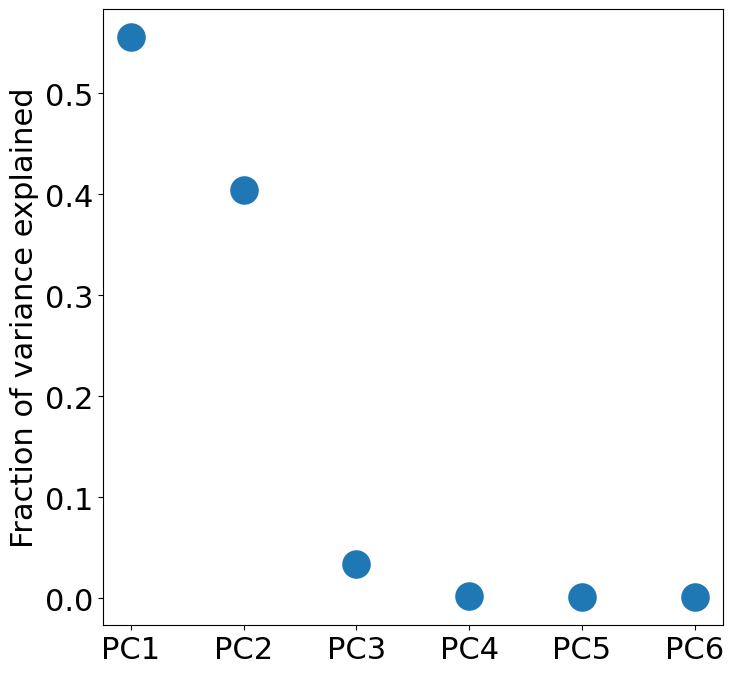

In [26]:
# Differences in variance explained
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize']=(8,8)

sns.scatterplot(x=pd.Series(pca.explained_variance_ratio_,index=['PC1', 'PC2','PC3','PC4','PC5','PC6']).index,
            y=pd.Series(pca.explained_variance_ratio_,index=['PC1', 'PC2','PC3','PC4','PC5','PC6']).values,
               s=500)
plt.ylabel('Fraction of variance explained')

In [27]:
# Get the PCs loadings
loadings=pd.DataFrame(pca.components_).transpose()
loadings.columns=(['PC'+i.astype(str) for i in np.arange(len(pca.components_)+1)[1:]])
loadings.index=df6d.columns.values
loadings['names']=loadings.index.values

Text(0.5, 0, '')

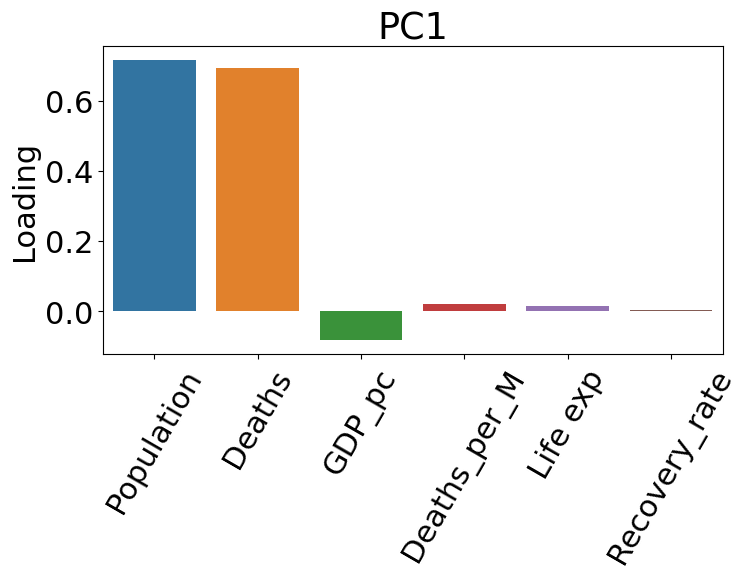

In [28]:
plt.rcParams['figure.figsize']=(8,4) #rescale figures

g=sns.barplot(data=loadings,y='PC1',x='names')
for item in g.get_xticklabels():
    item.set_rotation(60)
plt.xticks(ticks=np.arange(len(loadings)),labels=loadings.names)
plt.title('PC1')
plt.ylabel('Loading')
plt.xlabel('')

Text(0.5, 0, '')

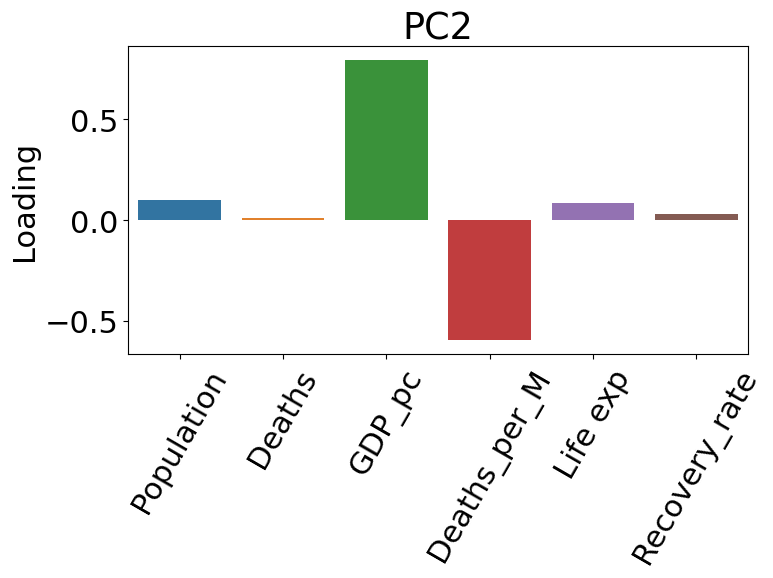

In [29]:
g=sns.barplot(data=loadings,y='PC2',x='names')
for item in g.get_xticklabels():
    item.set_rotation(60)
plt.xticks(ticks=np.arange(len(loadings)),labels=loadings.names)
plt.title('PC2')
plt.ylabel('Loading')
plt.xlabel('')

Text(0.5, 0, '')

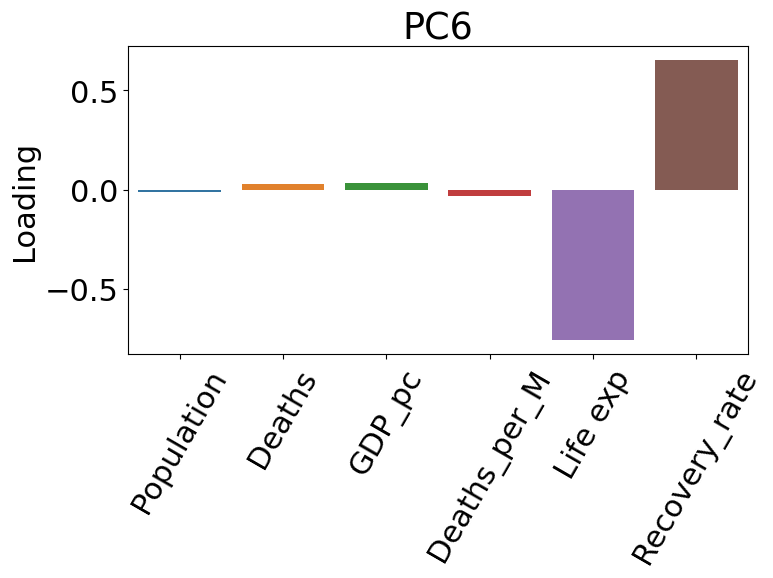

In [30]:
g=sns.barplot(data=loadings,y='PC6',x='names')
for item in g.get_xticklabels():
    item.set_rotation(60)
plt.xticks(ticks=np.arange(len(loadings)),labels=loadings.names)
plt.title('PC6')
plt.ylabel('Loading')
plt.xlabel('')